# **Packages** **Imported**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import numpy as np
from skimage.util import random_noise
import os
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np

In [ ]:
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose,MaxPooling2D
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import os
from time import time
import numpy as np

# **Adding** **Noise**

In [ ]:
def salt_pepper_noise(DIR,path):
  count=0
  for i in os.listdir(DIR):
    image=cv2.imread(os.path.join(DIR, i))
    noise_img = random_noise(image, mode='s&p',amount=0.3)
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    cv2.imwrite(path+str(count)+'.png',noise_img) 
    count+=1



In [ ]:
salt_pepper_noise('/content/gdrive/MyDrive/Breast Cancer DataSet (1)/Train (1)/Benign (1)','/content/gdrive/MyDrive/Breast Cancer DataSet/Train/Benign/salt_pepper_noise')

In [ ]:
salt_pepper_noise('/content/gdrive/MyDrive/Breast Cancer DataSet (1)/Train (1)/Malignant (1)','/content/gdrive/MyDrive/Breast Cancer DataSet/Train/Malignant/salt_pepper_noise')

In [ ]:
def Gaussian_noise(DIR,path):
  c1=0
  for i in os.listdir(DIR):
    image=cv2.imread(os.path.join(DIR, i))
    gauss = np.random.normal(0,1,image.size)
    gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
    img_gauss = cv2.add(image,gauss)
    cv2.imwrite(path+str(c1)+'.png',img_gauss) 
    c1+=1

In [ ]:
Gaussian_noise('/content/gdrive/MyDrive/Breast Cancer DataSet (1)/Train (1)/Benign (1)','/content/gdrive/MyDrive/Breast Cancer DataSet/Train/Benign/Gaussian_noise')

In [ ]:
Gaussian_noise('/content/gdrive/MyDrive/Breast Cancer DataSet (1)/Train (1)/Malignant (1)','/content/gdrive/MyDrive/Breast Cancer DataSet/Train/Malignant/Gaussian_noise')

In [ ]:
def speckle_noise(DIR,path):
  c2=0
  for i in os.listdir(DIR):
    image=cv2.imread(os.path.join(DIR, i))
    gauss = np.random.normal(0,1,image.size)
    gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
    noise = image + image * gauss
    cv2.imwrite(path+str(c2)+'.png',noise) 
    c2+=1

In [ ]:
speckle_noise('/content/gdrive/MyDrive/Breast Cancer DataSet (1)/Train (1)/Benign (1)','/content/gdrive/MyDrive/Breast Cancer DataSet/Train/Benign/speckle_noise')

In [ ]:
speckle_noise('/content/gdrive/MyDrive/Breast Cancer DataSet (1)/Train (1)/Malignant (1)','/content/gdrive/MyDrive/Breast Cancer DataSet/Train/Malignant/speckle_noise')

# **Loading** **DataSet**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


dataset_path = '/content/gdrive/MyDrive/Breast Cancer DataSet/Train'

images = []
labels = []

for subfolder in os.listdir(dataset_path):
  subfolder_path = os.path.join(dataset_path, subfolder)
  if not os.path.isdir(subfolder_path):
    continue
  

  for image_filename in os.listdir(subfolder_path):
    image_path = os.path.join(subfolder_path, image_filename)
    images.append(image_path)
    labels.append(subfolder)


df = pd.DataFrame({'image': images, 'label': labels})

In [ ]:

dataset_path = '/content/gdrive/MyDrive/Breast Cancer DataSet/Test'

images = []
labels = []


for subfolder in os.listdir(dataset_path):
  subfolder_path = os.path.join(dataset_path, subfolder)
  if not os.path.isdir(subfolder_path):
    continue
  
  
  for image_filename in os.listdir(subfolder_path):
    image_path = os.path.join(subfolder_path, image_filename)
    images.append(image_path)
    labels.append(subfolder)


df1 = pd.DataFrame({'image': images, 'label': labels})

In [ ]:
df1.tail()

,image,label
124,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
125,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
126,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
127,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
128,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign


In [ ]:
df.tail()

,image,label
3983,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
3984,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
3985,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
3986,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
3987,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_train=df['image']
X_test=df1['image']
y_train=df['label']
y_test=df1['label']


# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})




In [ ]:
df_train = df_train.sample(frac = 1)

In [ ]:
df_test = df_test.sample(frac = 1)

In [ ]:
df_train.reset_index(drop=True)

,image,label
0,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
1,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
2,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
3,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
4,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
...,...,...
3983,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
3984,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
3985,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
3986,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant


In [ ]:
df_test.reset_index(drop=True)

,image,label
0,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
1,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
2,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
3,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
4,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
...,...,...
124,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Benign
125,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
126,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant
127,/content/gdrive/MyDrive/Breast Cancer DataSet/...,Malignant


In [ ]:
print(len(df_train))

3988


In [ ]:
print(len(df_test))

129


# **VGG**-**16** 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator( rescale = 1./255) 


train_generator = train_datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode = 'rgb'
)


test_generator =test_datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode = 'rgb'
)

Found 3988 validated image filenames belonging to 2 classes.
Found 129 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras import layers 

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [ ]:
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications import VGG16
#from keras.preprocessing import image


# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = (224, 224, 3), weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required by VGG

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
#x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(2, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# ModelCheckpoint callback - save best weights
from keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.keras import PlotLossesCallback
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

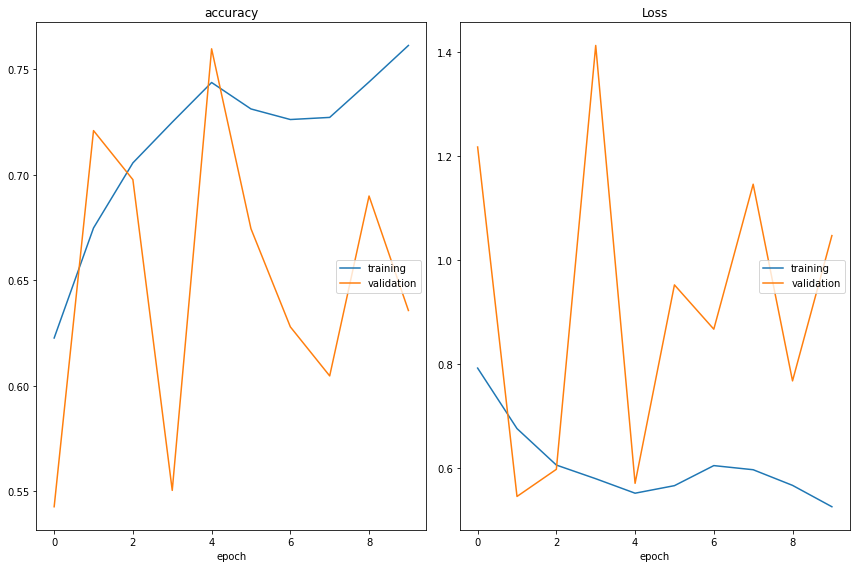

accuracy
	training         	 (min:    0.623, max:    0.761, cur:    0.761)
	validation       	 (min:    0.543, max:    0.760, cur:    0.636)
Loss
	training         	 (min:    0.526, max:    0.793, cur:    0.526)
	validation       	 (min:    0.546, max:    1.413, cur:    1.047)
125/125 [==============================] - 94s 754ms/step - loss: 0.5262 - accuracy: 0.7613 - val_loss: 1.0472 - val_accuracy: 0.6357


In [ ]:
vgghist = model.fit(train_generator, validation_data = test_generator, epochs = 10,callbacks=[tl_checkpoint_1, early_stop,PlotLossesCallback()])

In [ ]:
model.load_weights('tl_model_v1.weights.best.hdf5')

In [ ]:
metrics = model.evaluate(test_generator)

5/5 [==============================] - 2s 389ms/step - loss: 0.5712 - accuracy: 0.7597


In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

model_preds = model.predict(test_generator)
model_pred_classes = np.argmax(model_preds, axis=1)

5/5 [==============================] - 2s 436ms/step


In [ ]:
from sklearn.metrics import accuracy_score

model_acc = accuracy_score(true_classes,model_pred_classes)
print("VGG16 Model Accuracy : {:.2f}%".format(model_acc * 100))

VGG16 Model Accuracy : 75.97%


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_classes,model_pred_classes)

Text(33.0, 0.5, 'Actual Value')

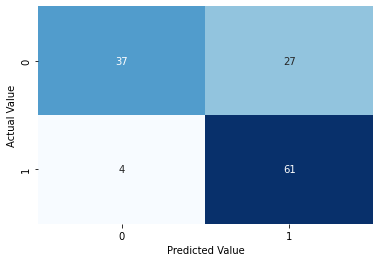

In [ ]:
from sklearn import metrics as mt
sns.heatmap(cm, annot = True, cmap="Blues",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
print(mt.classification_report(true_classes, model_pred_classes))

              precision    recall  f1-score   support

           0       0.90      0.58      0.70        64
           1       0.69      0.94      0.80        65

    accuracy                           0.76       129
   macro avg       0.80      0.76      0.75       129
weighted avg       0.80      0.76      0.75       129



# **ResNet50**

In [ ]:
import keras as K

In [ ]:

res_model = K.applications.ResNet50(include_top=False,
                                        weights="imagenet",
                                        input_shape = (224, 224, 3))

for layer in res_model.layers[:143]:
  layer.trainable = False
model = K.models.Sequential()
model.add(res_model)
model.add(K.layers.Flatten())
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(256, activation='relu'))
model.add(K.layers.Dropout(0.5))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(128, activation='relu'))
model.add(K.layers.Dropout(0.5))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(64, activation='relu'))
model.add(K.layers.Dropout(0.5))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(2, activation='softmax'))

0 input_13 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv -

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# ModelCheckpoint callback - save best weights
from keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.keras import PlotLossesCallback
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v2.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

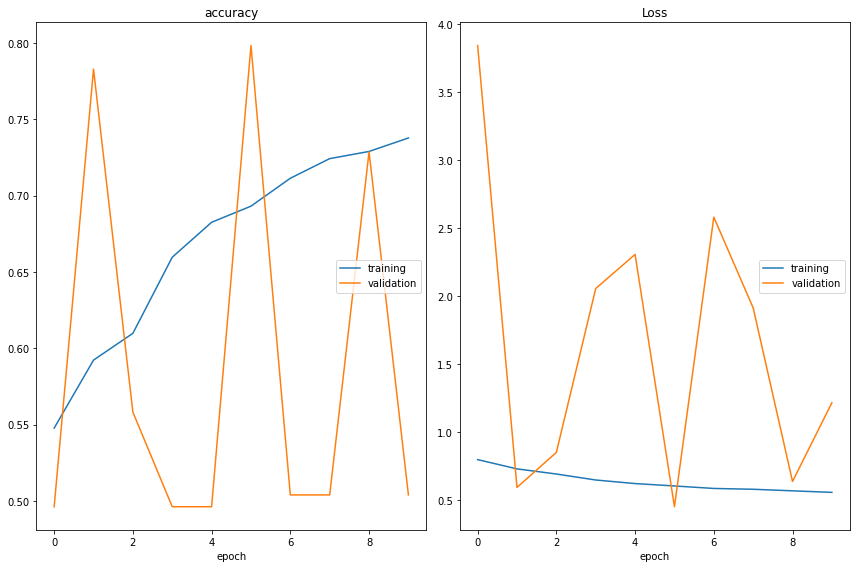

accuracy
	training         	 (min:    0.548, max:    0.738, cur:    0.738)
	validation       	 (min:    0.496, max:    0.798, cur:    0.504)
Loss
	training         	 (min:    0.557, max:    0.798, cur:    0.557)
	validation       	 (min:    0.451, max:    3.845, cur:    1.216)
100/100 [==============================] - 79s 791ms/step - loss: 0.5568 - accuracy: 0.7378 - val_loss: 1.2162 - val_accuracy: 0.5039


In [ ]:
resnet_history = model.fit(train_generator, validation_data = test_generator, steps_per_epoch=100,epochs = 10,callbacks=[tl_checkpoint_1, early_stop,PlotLossesCallback()])

In [ ]:
model.load_weights('tl_model_v2.weights.best.hdf5')

In [ ]:
metrics =model.evaluate(test_generator)

5/5 [==============================] - 2s 436ms/step - loss: 0.4510 - accuracy: 0.7984


In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

model_preds = model.predict(test_generator)
model_pred_classes = np.argmax(model_preds, axis=1)

5/5 [==============================] - 3s 407ms/step


In [ ]:
from sklearn.metrics import accuracy_score

model_acc = accuracy_score(true_classes,model_pred_classes)
print("ResNet Model Accuracy : {:.2f}%".format(model_acc * 100))

ResNet Model Accuracy : 79.84%


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_classes,model_pred_classes)

Text(33.0, 0.5, 'Actual Value')

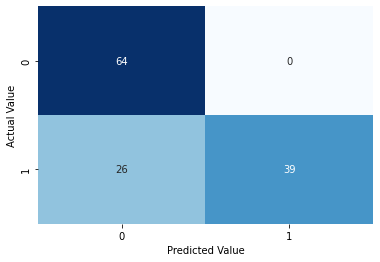

In [ ]:
from sklearn import metrics as mt
sns.heatmap(cm, annot = True, cmap="Blues",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
print(mt.classification_report(true_classes, model_pred_classes))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        64
           1       1.00      0.60      0.75        65

    accuracy                           0.80       129
   macro avg       0.86      0.80      0.79       129
weighted avg       0.86      0.80      0.79       129



# **DENSENET**

In [ ]:
from keras.layers import Input, Dense, Flatten

In [ ]:
from keras.applications.densenet import DenseNet201

In [ ]:
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)

In [ ]:
inputs = Input(shape=(224,224,3))

# DenseNet
densenet201 = DenseNet201(weights='imagenet', include_top=False)(inputs)

# Our FC layer
flat1 = Flatten()(densenet201)
dense1 = Dense(units=256, use_bias=True)(flat1)
batchnorm1 = BatchNormalization()(dense1)
act1 = Activation(activation='relu')(batchnorm1)
drop1 = Dropout(rate=0.5)(act1)

# Output
out = Dense(units=2, activation='softmax')(drop1)

# Create Model
model = Model(inputs=inputs, outputs=out)
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.keras import PlotLossesCallback
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v3.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

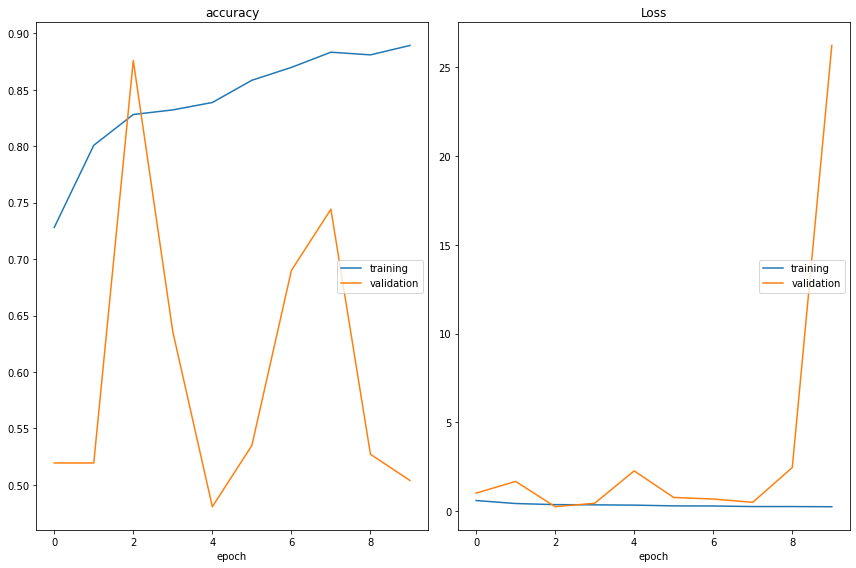

accuracy
	training         	 (min:    0.728, max:    0.889, cur:    0.889)
	validation       	 (min:    0.481, max:    0.876, cur:    0.504)
Loss
	training         	 (min:    0.258, max:    0.608, cur:    0.258)
	validation       	 (min:    0.262, max:   26.214, cur:   26.214)
100/100 [==============================] - 94s 934ms/step - loss: 0.2584 - accuracy: 0.8893 - val_loss: 26.2141 - val_accuracy: 0.5039


In [ ]:
dense_history = model.fit(train_generator, validation_data = test_generator, steps_per_epoch=100,epochs = 10,callbacks=[tl_checkpoint_1, early_stop,PlotLossesCallback()])

In [ ]:
model.load_weights('tl_model_v3.weights.best.hdf5')

In [ ]:
metrics =model.evaluate(test_generator)

5/5 [==============================] - 2s 397ms/step - loss: 0.2624 - accuracy: 0.8760


In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

model_preds = model.predict(test_generator)
model_pred_classes = np.argmax(model_preds, axis=1)

5/5 [==============================] - 5s 426ms/step


In [ ]:
from sklearn.metrics import accuracy_score

model_acc = accuracy_score(true_classes,model_pred_classes)
print("ResNet Model Accuracy : {:.2f}%".format(model_acc * 100))

ResNet Model Accuracy : 87.60%


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_classes,model_pred_classes)

Text(33.0, 0.5, 'Actual Value')

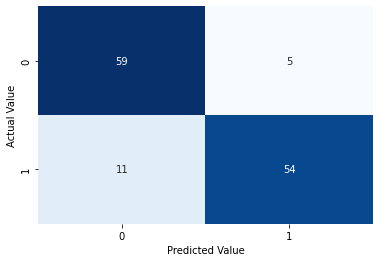

In [ ]:
from sklearn import metrics as mt
sns.heatmap(cm, annot = True, cmap="Blues",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
print(mt.classification_report(true_classes, model_pred_classes))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        64
           1       0.92      0.83      0.87        65

    accuracy                           0.88       129
   macro avg       0.88      0.88      0.88       129
weighted avg       0.88      0.88      0.88       129



# **MOBILENET**

In [ ]:
from keras.applications import MobileNet

In [ ]:
import tensorflow as tf

In [ ]:
image_size = 224
IMG_SHAPE = (image_size, image_size, 3)

#Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False,
                                              weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
import keras

In [ ]:
model = tf.keras.Sequential([
                          base_model,
                          keras.layers.GlobalAveragePooling2D(),
                          keras.layers.Dense(2, activation='softmax')])

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.keras import PlotLossesCallback
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v4.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

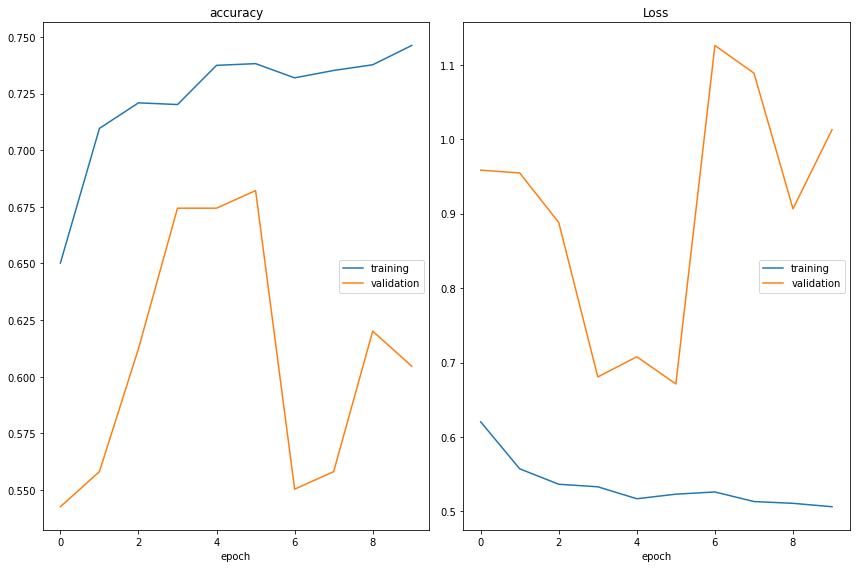

accuracy
	training         	 (min:    0.650, max:    0.746, cur:    0.746)
	validation       	 (min:    0.543, max:    0.682, cur:    0.605)
Loss
	training         	 (min:    0.506, max:    0.620, cur:    0.506)
	validation       	 (min:    0.671, max:    1.126, cur:    1.013)
125/125 [==============================] - 231s 2s/step - loss: 0.5064 - accuracy: 0.7462 - val_loss: 1.0128 - val_accuracy: 0.6047


In [ ]:
mobile_history = model.fit(train_generator, validation_data = test_generator, steps_per_epoch=125,epochs = 10,callbacks=[tl_checkpoint_1, early_stop,PlotLossesCallback()])

In [ ]:
model.load_weights('tl_model_v4.weights.best.hdf5')

In [ ]:
metrics =model.evaluate(test_generator)

5/5 [==============================] - 6s 1s/step - loss: 0.6713 - accuracy: 0.6822


In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

model_preds = model.predict(test_generator)
model_pred_classes = np.argmax(model_preds, axis=1)

5/5 [==============================] - 12s 2s/step


In [ ]:
from sklearn.metrics import accuracy_score

model_acc = accuracy_score(true_classes,model_pred_classes)
print("ResNet Model Accuracy : {:.2f}%".format(model_acc * 100))

ResNet Model Accuracy : 68.22%


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_classes,model_pred_classes)

Text(33.0, 0.5, 'Actual Value')

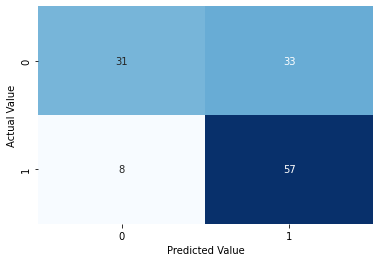

In [ ]:
from sklearn import metrics as mt
sns.heatmap(cm, annot = True, cmap="Blues",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
print(mt.classification_report(true_classes, model_pred_classes))

              precision    recall  f1-score   support

           0       0.79      0.48      0.60        64
           1       0.63      0.88      0.74        65

    accuracy                           0.68       129
   macro avg       0.71      0.68      0.67       129
weighted avg       0.71      0.68      0.67       129



# **Alex**  **Net**

In [ ]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    X=  Dropout(0.5 ,name="d0")(X)
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    X=  Dropout(0.5,name="d1")(X)
    X = Dense(2,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [ ]:
alex = AlexNet(train_generator[0][0].shape[1:])

In [ ]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

In [ ]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ModelCheckpoint callback - save best weights
from keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.keras import PlotLossesCallback
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

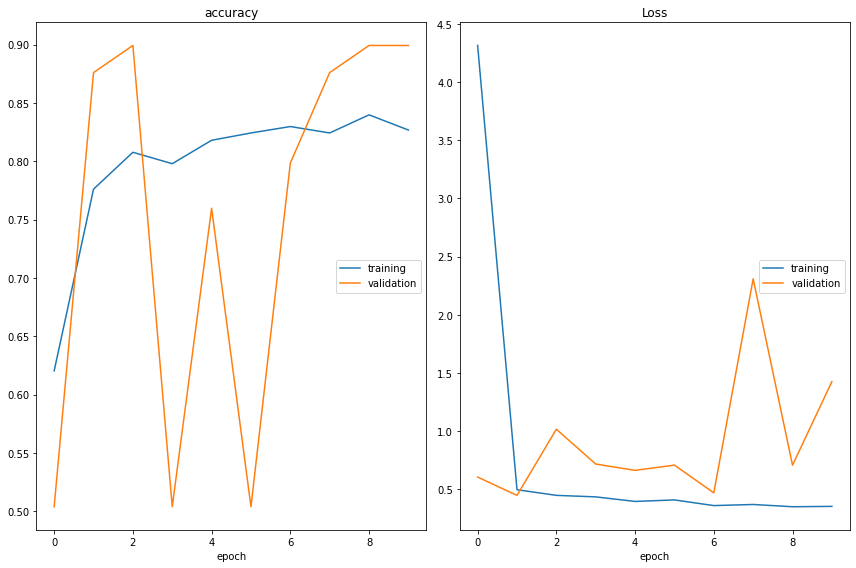

accuracy
	training         	 (min:    0.620, max:    0.840, cur:    0.827)
	validation       	 (min:    0.504, max:    0.899, cur:    0.899)
Loss
	training         	 (min:    0.351, max:    4.315, cur:    0.354)
	validation       	 (min:    0.448, max:    2.309, cur:    1.426)
125/125 [==============================] - 814s 7s/step - loss: 0.3538 - accuracy: 0.8267 - val_loss: 1.4262 - val_accuracy: 0.8992


In [ ]:
model_history = alex.fit(train_generator,
                            batch_size=32,
                            epochs=10,
                            validation_data=test_generator,
                            callbacks=[tl_checkpoint_1, early_stop,PlotLossesCallback()],
                            verbose=1)

In [ ]:
alex.load_weights('tl_model_v1.weights.best.hdf5')

In [ ]:
metrics = alex.evaluate(test_generator)

5/5 [==============================] - 7s 1s/step - loss: 0.4333 - accuracy: 0.9457


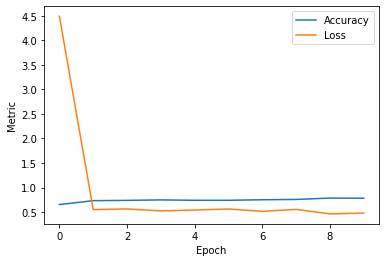

In [ ]:
history = model_history.history

# Plot the accuracy and loss of the model over time
plt.plot(history['accuracy'])
plt.plot(history['loss'])
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Metric')
#plt.ylim([0.5, 1])
plt.show()

In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

model_preds = alex.predict(test_generator)
model_pred_classes = np.argmax(model_preds, axis=1)

5/5 [==============================] - 7s 1s/step


In [ ]:
from sklearn.metrics import accuracy_score

model_acc = accuracy_score(true_classes,model_pred_classes)
print("Alex Model Accuracy : {:.2f}%".format(model_acc * 100))

Alex Model Accuracy : 94.57%


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_classes,model_pred_classes)

Text(33.0, 0.5, 'Actual Value')

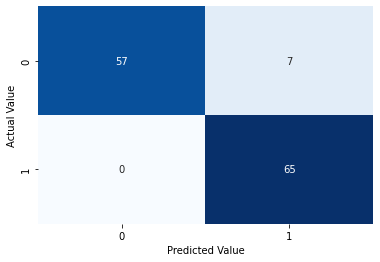

In [ ]:
from sklearn import metrics as mt
sns.heatmap(cm, annot = True, cmap="Blues",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
print(mt.classification_report(true_classes, model_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        64
           1       0.90      1.00      0.95        65

    accuracy                           0.95       129
   macro avg       0.95      0.95      0.95       129
weighted avg       0.95      0.95      0.95       129



# **VGG16**

In [ ]:
image_size = (224, 224)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode = 'rgb'
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode = 'rgb'
)

Found 3988 validated image filenames belonging to 2 classes.
Found 129 validated image filenames belonging to 2 classes.


In [ ]:
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.8))
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.8))
model.add(Dense(units=2, activation="softmax"))

In [ ]:
from keras.optimizers import Adam
#opt = Adam(lr=0.001)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_471 (Conv2D)         (None, 224, 224, 64)      1792      
                                                                 
 conv2d_472 (Conv2D)         (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_473 (Conv2D)         (None, 112, 112, 128)     73856     
                                                                 
 conv2d_474 (Conv2D)         (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint(filepath='tl_model_v2.weights.best.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=20,restore_best_weights=True, verbose=1, mode='min')
hist = model.fit(train_generator,
                            batch_size=32,
                            epochs=20,
                            validation_data=test_generator,
                            callbacks=[checkpoint, early],
                            verbose=1)

Epoch 1/20
125/125 [==============================] - ETA: 0s - loss: 0.8588 - accuracy: 0.6006
Epoch 1: val_accuracy improved from -inf to 0.50388, saving model to tl_model_v2.weights.best.hdf5
125/125 [==============================] - 136s 1s/step - loss: 0.8588 - accuracy: 0.6006 - val_loss: 0.7156 - val_accuracy: 0.5039
Epoch 2/20
125/125 [==============================] - ETA: 0s - loss: 0.6685 - accuracy: 0.6128
Epoch 2: val_accuracy did not improve from 0.50388
125/125 [==============================] - 122s 970ms/step - loss: 0.6685 - accuracy: 0.6128 - val_loss: 0.7156 - val_accuracy: 0.5039
Epoch 3/20
125/125 [==============================] - ETA: 0s - loss: 0.6687 - accuracy: 0.6128
Epoch 3: val_accuracy did not improve from 0.50388
125/125 [==============================] - 117s 936ms/step - loss: 0.6687 - accuracy: 0.6128 - val_loss: 0.7115 - val_accuracy: 0.5039
Epoch 4/20
125/125 [==============================] - ETA: 0s - loss: 0.6682 - accuracy: 0.6128
Epoch 4: val_

KeyboardInterrupt: ignored

In [ ]:
model.load_weights('tl_model_v2.weights.best.hdf5')

In [ ]:
metrics = model.evaluate(test_generator)

In [ ]:
history = hist.history

# Plot the accuracy and loss of the model over time
plt.plot(history['accuracy'])
plt.plot(history['loss'])
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Metric')
#plt.ylim([0.5, 1])
plt.show()

In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

model_preds = model.predict(test_generator)
model_pred_classes = np.argmax(model_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

model_acc = accuracy_score(true_classes,model_pred_classes)
print("VGG16 Model Accuracy : {:.2f}%".format(model_acc * 100))

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_classes,model_pred_classes)

In [ ]:
from sklearn import metrics as mt
sns.heatmap(cm, annot = True, cmap="Blues",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
print(mt.classification_report(true_classes, model_pred_classes))

# **Data** **Augmentation**

In [ ]:
image_size = (224, 224)
batch_size = 64

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator( rescale = 1./255) 
# Create a generator for the training data
train_generator = train_datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode = 'rgb'
)

# Create a generator for the test data
test_generator = test_datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode = 'rgb'
)

Found 3988 validated image filenames belonging to 2 classes.
Found 129 validated image filenames belonging to 2 classes.


# **Resnet**

In [ ]:
def resnet(input_shape, n_classes):
  
  def conv_bn_rl(x, f, k=1, s=1, p='same'):
    x = Conv2D(f, k, strides=s, padding=p)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
  
  
  def identity_block(tensor, f):
    x = conv_bn_rl(tensor, f)
    x = conv_bn_rl(x, f, 3)
    x = Conv2D(4*f, 1)(x)
    x = BatchNormalization()(x)
    
    x = Add()([x, tensor])
    output = ReLU()(x)
    return output
  
  
  def conv_block(tensor, f, s):
    x = conv_bn_rl(tensor, f)
    x = conv_bn_rl(x, f, 3, s)
    x = Conv2D(4*f, 1)(x)
    x = BatchNormalization()(x)
    
    shortcut = Conv2D(4*f, 1, strides=s)(tensor)
    shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    output = ReLU()(x)
    return output
  
  
  def resnet_block(x, f, r, s=2):
    x = conv_block(x, f, s)
    for _ in range(r-1):
      x = identity_block(x, f)
    return x
    
  
  input = Input(input_shape)
  
  x = conv_bn_rl(input, 64, 7, 2)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  x = resnet_block(x, 64, 3, 1)
  x = resnet_block(x, 128, 4)
  x = resnet_block(x, 256, 6)
  x = resnet_block(x, 512, 3)
  
  x = GlobalAvgPool2D()(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [ ]:
img_shape = [224,224,3]
resnet_model = resnet(img_shape,2)

In [ ]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 112, 112, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tl_checkpoint_3 = ModelCheckpoint(filepath='tl_model_v3.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop_3 = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

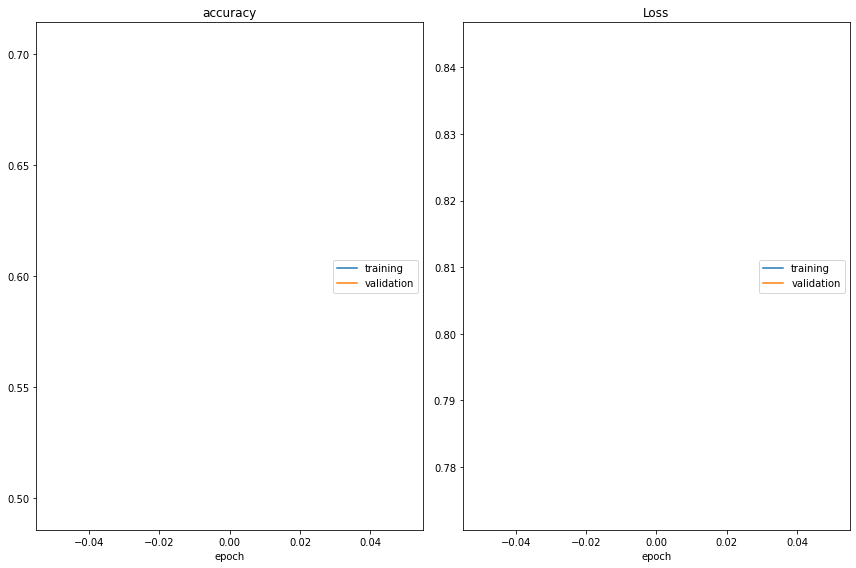

accuracy
	training         	 (min:    0.704, max:    0.704, cur:    0.704)
	validation       	 (min:    0.496, max:    0.496, cur:    0.496)
Loss
	training         	 (min:    0.843, max:    0.843, cur:    0.843)
	validation       	 (min:    0.774, max:    0.774, cur:    0.774)
63/63 [==============================] - 3054s 48s/step - loss: 0.8433 - accuracy: 0.7039 - val_loss: 0.7740 - val_accuracy: 0.4961
Epoch 2/10
49/63 [======================>.......] - ETA: 11:07 - loss: 0.4974 - accuracy: 0.7685

In [ ]:
resnet_model_history  = resnet_model.fit(train_generator,
                            batch_size=64,
                            epochs=10,
                            validation_data=test_generator,
                            callbacks=[tl_checkpoint_3, early_stop_3,PlotLossesCallback()],
                            verbose=1)

In [ ]:
resnet_model.load_weights('tl_model_v3.weights.best.hdf5')

In [ ]:
metrics = resnet_model.evaluate(test_generator)

In [ ]:
history = resnet_model_history.history

# Plot the accuracy and loss of the model over time
plt.plot(history['accuracy'])
plt.plot(history['loss'])
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Metric')
#plt.ylim([0.5, 1])
plt.show()

In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

model_preds = resnet_model.predict(test_generator)
model_pred_classes = np.argmax(model_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

model_acc = accuracy_score(true_classes,model_pred_classes)
print("ResNet Model Accuracy : {:.2f}%".format(model_acc * 100))

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_classes,model_pred_classes)

In [ ]:
from sklearn import metrics
sns.heatmap(cm, annot = True, cmap="Blues",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
from sklearn import metrics as mt

In [ ]:
print(mt.classification_report(true_classes, model_pred_classes))

# **Mobile** **Net**

In [ ]:
def mobilenet(input_shape, n_classes):
  
  def mobilenet_block(x, f, s=1):
    x = DepthwiseConv2D(3, strides=s, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(f, 1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
    
    
  input = Input(input_shape)

  x = Conv2D(32, 3, strides=2, padding='same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  x = mobilenet_block(x, 64)
  x = mobilenet_block(x, 128, 2)
  x = mobilenet_block(x, 128)

  x = mobilenet_block(x, 256, 2)
  x = mobilenet_block(x, 256)

  x = mobilenet_block(x, 512, 2)
  for _ in range(5):
    x = mobilenet_block(x, 512)

  x = mobilenet_block(x, 1024, 2)
  x = mobilenet_block(x, 1024)
  
  x = GlobalAvgPool2D()(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [ ]:
img_shape = [224,224,3]
mobilenet_model = mobilenet(img_shape,2)

In [ ]:
mobilenet_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_537 (Conv2D)         (None, 112, 112, 32)      896       
                                                                 
 batch_normalization_302 (Ba  (None, 112, 112, 32)     128       
 tchNormalization)                                               
                                                                 
 re_lu_278 (ReLU)            (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d_29 (Depthw  (None, 112, 112, 32)     320       
 iseConv2D)                                                      
                                                                 
 batch_normalization_303 (Ba  (None, 112, 112, 32)     128 

In [ ]:
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tl_checkpoint_4 = ModelCheckpoint(filepath='tl_model_v4.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop_4 = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

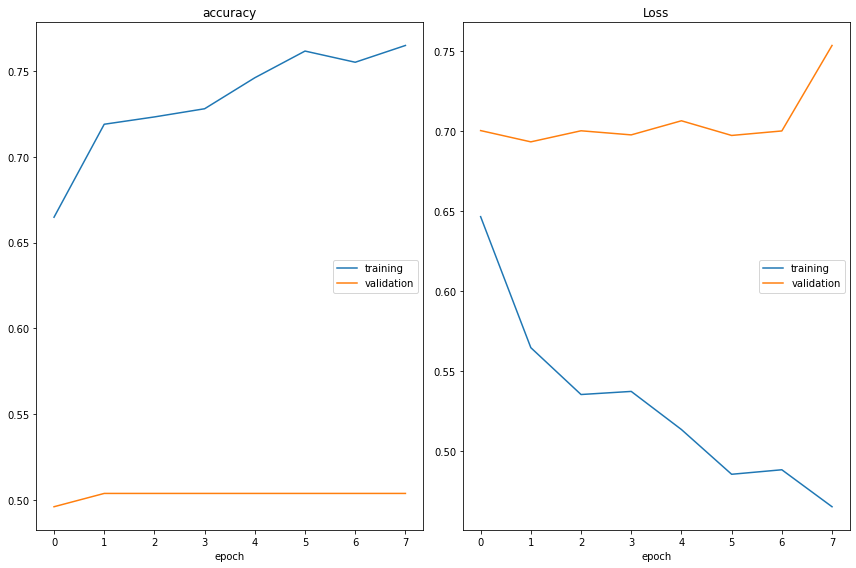

accuracy
	training         	 (min:    0.665, max:    0.765, cur:    0.765)
	validation       	 (min:    0.496, max:    0.504, cur:    0.504)
Loss
	training         	 (min:    0.465, max:    0.647, cur:    0.465)
	validation       	 (min:    0.693, max:    0.754, cur:    0.754)
63/63 [==============================] - 101s 2s/step - loss: 0.4649 - accuracy: 0.7648 - val_loss: 0.7537 - val_accuracy: 0.5039
Epoch 9/10
17/63 [=======>......................] - ETA: 1:10 - loss: 0.4576 - accuracy: 0.7748

In [ ]:
mobilenet_model_history  = mobilenet_model.fit(train_generator,
                            batch_size=64,
                            epochs=10,
                            validation_data=test_generator,
                            callbacks=[tl_checkpoint_4, early_stop_4,PlotLossesCallback()],
                            verbose=1)

In [ ]:
mobilenet_model.load_weights('tl_model_v4.weights.best.hdf5')

In [ ]:
metrics = mobilenet_model.evaluate(test_generator)

In [ ]:
history = mobilenet_model_history.history

# Plot the accuracy and loss of the model over time
plt.plot(history['accuracy'])
plt.plot(history['loss'])
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Metric')
#plt.ylim([0.5, 1])
plt.show()

In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

model_preds = mobilenet_model.predict(test_generator)
model_pred_classes = np.argmax(model_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

model_acc = accuracy_score(true_classes,model_pred_classes)
print("ResNet Model Accuracy : {:.2f}%".format(model_acc * 100))

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_classes,model_pred_classes)

In [ ]:
from sklearn import metrics as mt 
sns.heatmap(cm, annot = True, cmap="Blues",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
print(mt.classification_report(true_classes, model_pred_classes))

# **Dense** **Net**

In [ ]:
def densenet(img_shape, n_classes, f=32):
  repetitions = 6, 12, 24, 16
  
  def bn_rl_conv(x, f, k=1, s=1, p='same'):
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(f, k, strides=s, padding=p)(x)
    return x
  
  
  def dense_block(tensor, r):
    for _ in range(r):
      x = bn_rl_conv(tensor, 4*f)
      x = bn_rl_conv(x, f, 3)
      tensor = Concatenate()([tensor, x])
    return tensor
  
  
  def transition_block(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
    x = AvgPool2D(2, strides=2, padding='same')(x)
    return x
  
  
  input = Input(img_shape)
  
  x = Conv2D(64, 7, strides=2, padding='same')(input)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  for r in repetitions:
    d = dense_block(x, r)
    x = transition_block(d)
  
  x = GlobalAvgPool2D()(d)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [ ]:
img_shape = [224,224,3]
densenet_model = densenet(img_shape,2)

In [ ]:
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tl_checkpoint_5 = ModelCheckpoint(filepath='tl_model_v5.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop_5 = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [ ]:
densenet_model_history  = densenet_model.fit(train_generator,
                            batch_size=64,
                            epochs=10,
                            validation_data=test_generator,
                            callbacks=[tl_checkpoint_5, early_stop_5,PlotLossesCallback()],
                            verbose=1)

In [ ]:
densenet_model.load_weights('tl_model_v5.weights.best.hdf5')

In [ ]:
metrics = densenet_model.evaluate(test_generator)

In [ ]:
history = densenet_model_history.history

# Plot the accuracy and loss of the model over time
plt.plot(history['accuracy'])
plt.plot(history['loss'])
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Metric')
#plt.ylim([0.5, 1])
plt.show()

In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

model_preds = densenet_model.predict(test_generator)
model_pred_classes = np.argmax(model_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

model_acc = accuracy_score(true_classes,model_pred_classes)
print("DenseNet Model Accuracy : {:.2f}%".format(model_acc * 100))

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_classes,model_pred_classes)

In [ ]:
from sklearn import metrics as mt 
sns.heatmap(cm, annot = True, cmap="Blues",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
print(mt.classification_report(true_classes, model_pred_classes))

# **Shuffle** **Net**

In [ ]:
def shufflenet(input_shape, n_classes, g=8):
  channels = 384, 769, 1536
  repetitions = 3, 7, 3
  
  def ch_shuffle(x, g):
    _, w, h, ch = K.int_shape(x)
    ch_g = ch // g
    
    def shuffle_op(x):
      x = K.reshape(x, [-1, w, h, ch_g, g])
      x = K.permute_dimensions(x, [0, 1, 2, 4, 3])
      x = K.reshape(x, [-1, w, h, ch])
      return x
    
    x = Lambda(shuffle_op)(x)
    return x


  def gconv(tensor, ch, g):
    _, _, _, in_ch = K.int_shape(tensor)
    ch_g = in_ch // g
    out_ch = ch // g
    group = []
    for i in range(g):
      x = Lambda(lambda x: x[:, :, :, i*ch_g: (i+1)*ch_g])(tensor)
      x = Conv2D(out_ch, 1)(x)
      group.append(x)
    
    x = Concatenate()(group)
    return x
  
  
  def shufflenet_block(tensor, ch, s, g):
    x = gconv(tensor, ch // 4, g)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = ch_shuffle(x, g)
    x = DepthwiseConv2D(3, strides=s, padding='same')(x)
    x = BatchNormalization()(x)
    x = gconv(x, ch if s==1 else ch-K.int_shape(tensor)[-1], g)
    x = BatchNormalization()(x)
    
    if s == 1:
      x = Add()([tensor, x])
    else:
      avg = AvgPool2D(3, strides=2, padding='same')(tensor)
      x = Concatenate()([avg, x])


    output = ReLU()(x)
    return output
  
  
  def stage(x, ch, r, g):
    x = shufflenet_block(x, ch, 2, g)
    
    for i in range(r):
      x = shufflenet_block(x, ch, 1, g)
      
    return x
  
  input = Input(input_shape)
  
  x = Conv2D(24, 3, strides=2, padding='same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  for ch, r in zip(channels, repetitions):
    x = stage(x, ch, r, g)
    
  x = GlobalAvgPool2D()(x)
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [ ]:
img_shape = [224,224,3]
shufflenet_model = shufflenet(img_shape,2)

In [ ]:
shufflenet_model.summary()

In [ ]:
shufflenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tl_checkpoint_6 = ModelCheckpoint(filepath='tl_model_v6.weights.best.hdf5',
                                  save_best_only=True,
                                  monitor='val_accuracy', mode='max',
                                  verbose=1)

# EarlyStopping
early_stop_6 = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [ ]:
shufflenet_model_history  = model.fit(train_generator,
                            batch_size=64,
                            epochs=10,
                            validation_data=test_generator,
                            callbacks=[tl_checkpoint_6, early_stop_6,PlotLossesCallback()],
                            verbose=1)

In [ ]:
shufflenet_model.load_weights('tl_model_v6.weights.best.hdf5')

In [ ]:
metrics = shufflenet_model.evaluate(test_generator)

In [ ]:
history = shufflenet_model_history.history

# Plot the accuracy and loss of the model over time
plt.plot(history['accuracy'])
plt.plot(history['loss'])
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.ylim([0.5, 1])
plt.show()

In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

model_preds = shufflenet_model.predict(test_generator)
model_pred_classes = np.argmax(model_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

model_acc = accuracy_score(true_classes,model_pred_classes)
print("ShuffleNet Model Accuracy : {:.2f}%".format(model_acc * 100))

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_classes,model_pred_classes)

In [ ]:
from sklearn import metrics as mt 
sns.heatmap(cm, annot = True, cmap="Blues",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
print(mt.classification_report(true_classes, model_pred_classes))